<a href="https://colab.research.google.com/github/vitroid/GenIce/blob/main/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

On Google Colaboratory, you must install GenIce2 and extra plugins by yourself.


In [14]:
# install GenIce2 and extra plugins from PyPI via pip.
! pip install genice2 genice2-svg genice2-cage genice2-twist
exit()

## Output in Gromacs format.

A simplest example.

In [13]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("ice11") 
formatter  = Format("gromacs")
water      = Molecule("spce")
ice = GenIce(lattice).generate_ice(formatter, water=water)
print(ice)

Generated by GenIce https://github.com/vitroid/GenIce 
48
    1SOL     Ow    1   0.220  -0.003   0.095
    1SOL     Hw    2   0.302  -0.050   0.062
    1SOL     Hw    3   0.220   0.092   0.062
    2SOL     Ow    4   0.220   0.256   0.004
    2SOL     Hw    5   0.302   0.304   0.037
    2SOL     Hw    6   0.220   0.256  -0.096
    3SOL     Ow    7   0.229   0.003   0.370
    3SOL     Hw    8   0.229   0.003   0.270
    3SOL     Hw    9   0.148  -0.045   0.404
    4SOL     Ow   10   0.229   0.262   0.462
    4SOL     Hw   11   0.148   0.309   0.429
    4SOL     Hw   12   0.229   0.167   0.429
    5SOL     Ow   13   0.669  -0.003   0.095
    5SOL     Hw   14   0.751  -0.050   0.062
    5SOL     Hw   15   0.669   0.092   0.062
    6SOL     Ow   16   0.669   0.256   0.004
    6SOL     Hw   17   0.669   0.256  -0.096
    6SOL     Hw   18   0.751   0.304   0.037
    7SOL     Ow   19   0.678   0.003   0.370
    7SOL     Hw   20   0.678   0.003   0.270
    7SOL     Hw   21   0.597  -0.045   0.4

## Generate an SVG image

Here we are using the Forms syntax of Google Colab to choose the ice type.

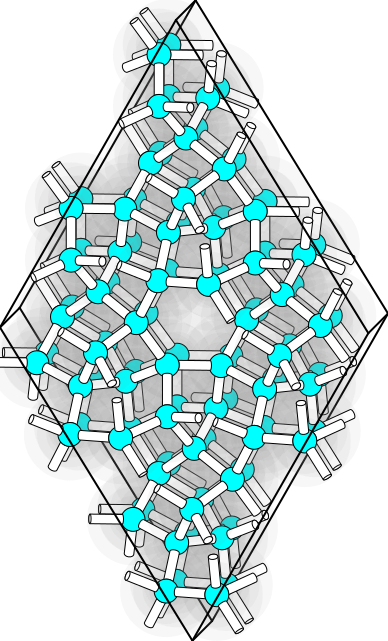

In [4]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

ice = "engel12" #@param ["ice1h", "ice2", "ice3", "engel12"] {allow-input: true}
#@markdown Press *Shift+Enter* to execute.

lattice    = Lattice(ice) 
formatter  = Format("svg", shadow=True,rotatex=5,rotatey=5)
# formatter  = Format("twist", svg=True,rotatex=5,rotatey=5)
img = GenIce(lattice, rep=[2,2,2]).generate_ice(formatter)

from IPython.display import SVG, display
display(SVG(img))

## Generate a PNG image

PNG renderer is also included in genice_svg package.

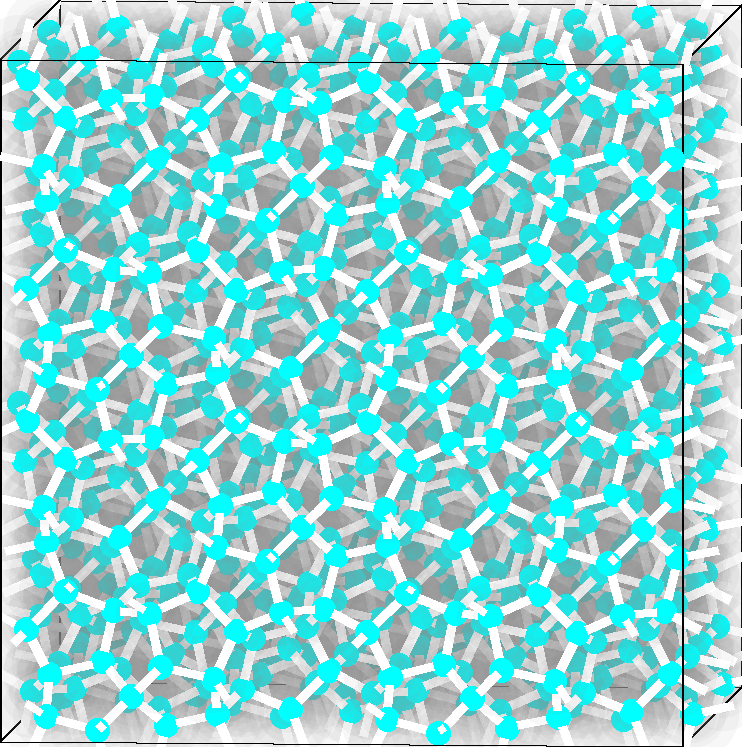

In [2]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("CS2") 
formatter  = Format("png", shadow="#8881",encode=False,bg="#fff",rotatex=5,rotatey=5)
img = GenIce(lattice, rep=[2,2,2]).generate_ice(formatter)

from IPython.display import display
display(img)

## Store the image in a file

Save it in a PNG file.

In [14]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("ice3") 
formatter  = Format("png", shadow="#8881",encode=True,bg="#fff",rotatex=5,rotatey=5)
img = GenIce(lattice, rep=[2,2,2]).generate_ice(formatter)

with open("ice3.png", "wb") as f:
    f.write(img)

## Analysis

Some statistical analyses are also available.

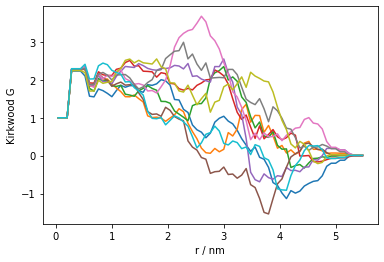

In [2]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule
import numpy as np
from matplotlib import pyplot as plt


lattice    = Lattice("1c") 
formatter  = Format("_KG")
water      = Molecule("spce")
for seed in range(1000,1010):
    result = GenIce(lattice, rep=(10,10,10), seed=seed).generate_ice(formatter, water=water)

    kg = np.fromstring(result, dtype=float, sep=" ")
    N = kg.shape[0]
    kg = kg.reshape([N//2, 2])
    plt.plot(kg[:,0], kg[:,1])

plt.xlabel("r / nm")
plt.ylabel("Kirkwood G")
plt.show()

## Logging

You may want to see the process log.

In [16]:
from logging import getLogger, INFO, DEBUG, WARNING
logger = getLogger()
logger.setLevel(INFO)

from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice   = Lattice("1c") 
formatter = Format("gromacs")
water     = Molecule("spce")
ice = GenIce(lattice, rep=(16,16,16), signature="Jupyter test").generate_ice(formatter, water=water)
with open("ice1c.gro", "w") as f:
    f.write(ice)

logger.setLevel(WARNING)

INFO:root:__init__: Constructor of GenIce.
INFO:root:  
INFO:root:  Jupyter test
INFO:root:No rotmatrices in lattice
INFO:root:Cell dimension:
INFO:root:  a = 4.0
INFO:root:  b = 4.0
INFO:root:  c = 4.0
INFO:root:  A = 90.0
INFO:root:  B = 90.0
INFO:root:  C = 90.0
INFO:root:Bond length (specified): 1.9
INFO:root:Target Density: 0.92
INFO:root:Original Density: 0.0037363002324809044
INFO:root:Bond length (scaled, nm): 0.3031365108343017
INFO:root:__init__: end.
INFO:root:__init__: 10 ms
INFO:root:Stage1: Replicate water molecules to make a repeated cell.
INFO:root:  Number of water molecules: 32768
INFO:root:  Number of water nodes: 8
INFO:root:Cell dimension:
INFO:root:  a = 0.6381821280722142
INFO:root:  b = 0.6381821280722142
INFO:root:  c = 0.6381821280722142
INFO:root:  A = 90.0
INFO:root:  B = 90.0
INFO:root:  C = 90.0
INFO:root:Stage1: end.
INFO:root:Stage1: 10 ms
INFO:root:Stage2: Make a random graph and replicate.
INFO:root:Stage2: end.
INFO:root:Stage2: 328 ms
INFO:root:  Num

## Raw data

You can access the "raw" (internal) data.

In [8]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("xFAU", rep=3) 
formatter  = Format("raw", stage=(1,))
raw = GenIce(lattice, signature="Aeroice 3xFAU").generate_ice(formatter)

raw

{'reppositions': array([[1.38777878e-17, 1.12372436e-01, 5.61862178e-02],
        [1.38777878e-17, 5.61862178e-02, 1.12372436e-01],
        [5.61862178e-02, 1.38777878e-17, 1.12372436e-01],
        ...,
        [1.37627564e-01, 6.93813782e-01, 7.50000000e-01],
        [1.93813782e-01, 6.37627564e-01, 7.50000000e-01],
        [2.50000000e-01, 6.37627564e-01, 6.93813782e-01]]),
 'repcell': array([[3.47347586, 0.        , 0.        ],
        [0.        , 3.47347586, 0.        ],
        [0.        , 0.        , 3.47347586]]),
 'repcagetype': None,
 'repcagepos': None,
 'cagetypes': None}

### Visualization by Plotly

Use the raw data to plot by yourself.

In [ ]:
! pip install plotly

In [ ]:
waters = raw["reppositions"]
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x = waters[:,0], 
                                   y = waters[:,1], 
                                   z = waters[:,2],
                                   marker=dict(size=10),
                                   mode = 'markers'
                                   )])
fig.show()

## Integration with py3Dmol.

Py3Dmol works on Google Colaboratory.

In [11]:
!pip install py3Dmol

  Using cached py3Dmol-0.9.1-py2.py3-none-any.whl (6.2 kB)
You should consider upgrading via the '/Users/matto/venvs/test-tilecycles/bin/python3 -m pip install --upgrade pip' command.


In [9]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("Ic") 
formatter  = Format("gromacs")
water      = Molecule("spce")
ice = GenIce(lattice, rep=(4,4,4)).generate_ice(formatter, water=water)

In [12]:
import py3Dmol

view = py3Dmol.view()
view.addModel(ice, 'gro')
view.setStyle({'stick':{}})
view.addUnitCell()
view.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol